# Visualizing Unemployment through Expansion and Recession

#### Importing Libraries

In [2]:
# reading in data
import pandas as pd
import datetime
import matplotlib.pylab as plt
import shutil as sh
import os
%matplotlib inline 

#### Reading and Cleaning the Data

In [3]:
# read in unemployment data
udf = pd.read_csv("UNRATE.csv")
udf.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [4]:
# look at data types
udf.dtypes

DATE       object
UNRATE    float64
dtype: object

In [5]:
# change date column to date data type
udf['DATE']=pd.to_datetime(udf['DATE'])
udf.dtypes

DATE      datetime64[ns]
UNRATE           float64
dtype: object

In [6]:
# set date as the index and use dates after 1950
udf.set_index('DATE',inplace=True)
udf = udf.loc['1950-01-01': ]
udf.head()

,UNRATE
DATE,
1950-01-01,6.5
1950-02-01,6.4
1950-03-01,6.3
1950-04-01,5.8
1950-05-01,5.5


In [7]:
# read in recession data
rdf = pd.read_csv("USREC.csv")
rdf.head()

,DATE,USREC
0,1854-12-01,1
1,1855-01-01,0
2,1855-02-01,0
3,1855-03-01,0
4,1855-04-01,0


In [8]:
# look at data types
rdf.dtypes

DATE     object
USREC     int64
dtype: object

In [9]:
# change date column to date data type
rdf['DATE']=pd.to_datetime(rdf['DATE'])
rdf.dtypes

DATE     datetime64[ns]
USREC             int64
dtype: object

In [10]:
# set date as the index and use dates after 1950
rdf.set_index('DATE',inplace=True)
rdf = rdf.loc['1950-01-01': ]
rdf.head()

,USREC
DATE,
1950-01-01,0
1950-02-01,0
1950-03-01,0
1950-04-01,0
1950-05-01,0


#### Preparing data to plot so that recessions are highlighted in gray

In [11]:
# making a recession column in unmployment df, True if recession, False if not
udf['recession'] = (rdf['USREC'] == 1)
udf.head()

,UNRATE,recession
DATE,,
1950-01-01,6.5,False
1950-02-01,6.4,False
1950-03-01,6.3,False
1950-04-01,5.8,False
1950-05-01,5.5,False


In [12]:
# creating start and end columns for recession
udf['end']=udf.index
udf['start']=udf['end'].shift(1)
udf.head()

,UNRATE,recession,end,start
DATE,,,,
1950-01-01,6.5,False,1950-01-01,NaT
1950-02-01,6.4,False,1950-02-01,1950-01-01
1950-03-01,6.3,False,1950-03-01,1950-02-01
1950-04-01,5.8,False,1950-04-01,1950-03-01
1950-05-01,5.5,False,1950-05-01,1950-04-01


In [13]:
# selecting dates for when recession starts and ends
starts = udf.start[(udf['recession']==True)]
ends = udf.end[(udf['recession']==True)]

In [14]:
# developing the number of shaded regions to show recessions
n = len(starts)

#### Plotting the Graph

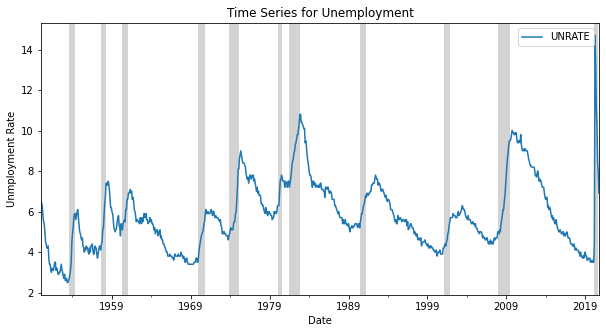

In [21]:
# develop the figure 
fig, ax = plt.subplots(figsize=(10,5))
udf.plot(y='UNRATE',ax=ax)

# loop to develop the shaded regions
for i in range(1,n):
    ax.axvspan(starts[i],ends[i], facecolor='lightgray')

# plot features 
plt.xlabel("Date")
plt.ylabel("Unmployment Rate")
plt.title("Time Series for Unemployment")
plt.show()